# Proyecto 1 IA v1.0.0

- Pablo Hidalgo
- Axel Chaves
- Kevin Nuñez

## Diabetes Prediction

In [62]:
# biblioteca para abrir el archivo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# bibliotecas necesarias para balancear el contenido
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
# bibliotecas necesarias para predicciones
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
# bibliotecas para el análisis de rendimiento
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score

In [63]:
dataset = pd.read_csv('Datasets/diabetes.csv')

In [64]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Imputación de datos faltantes

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


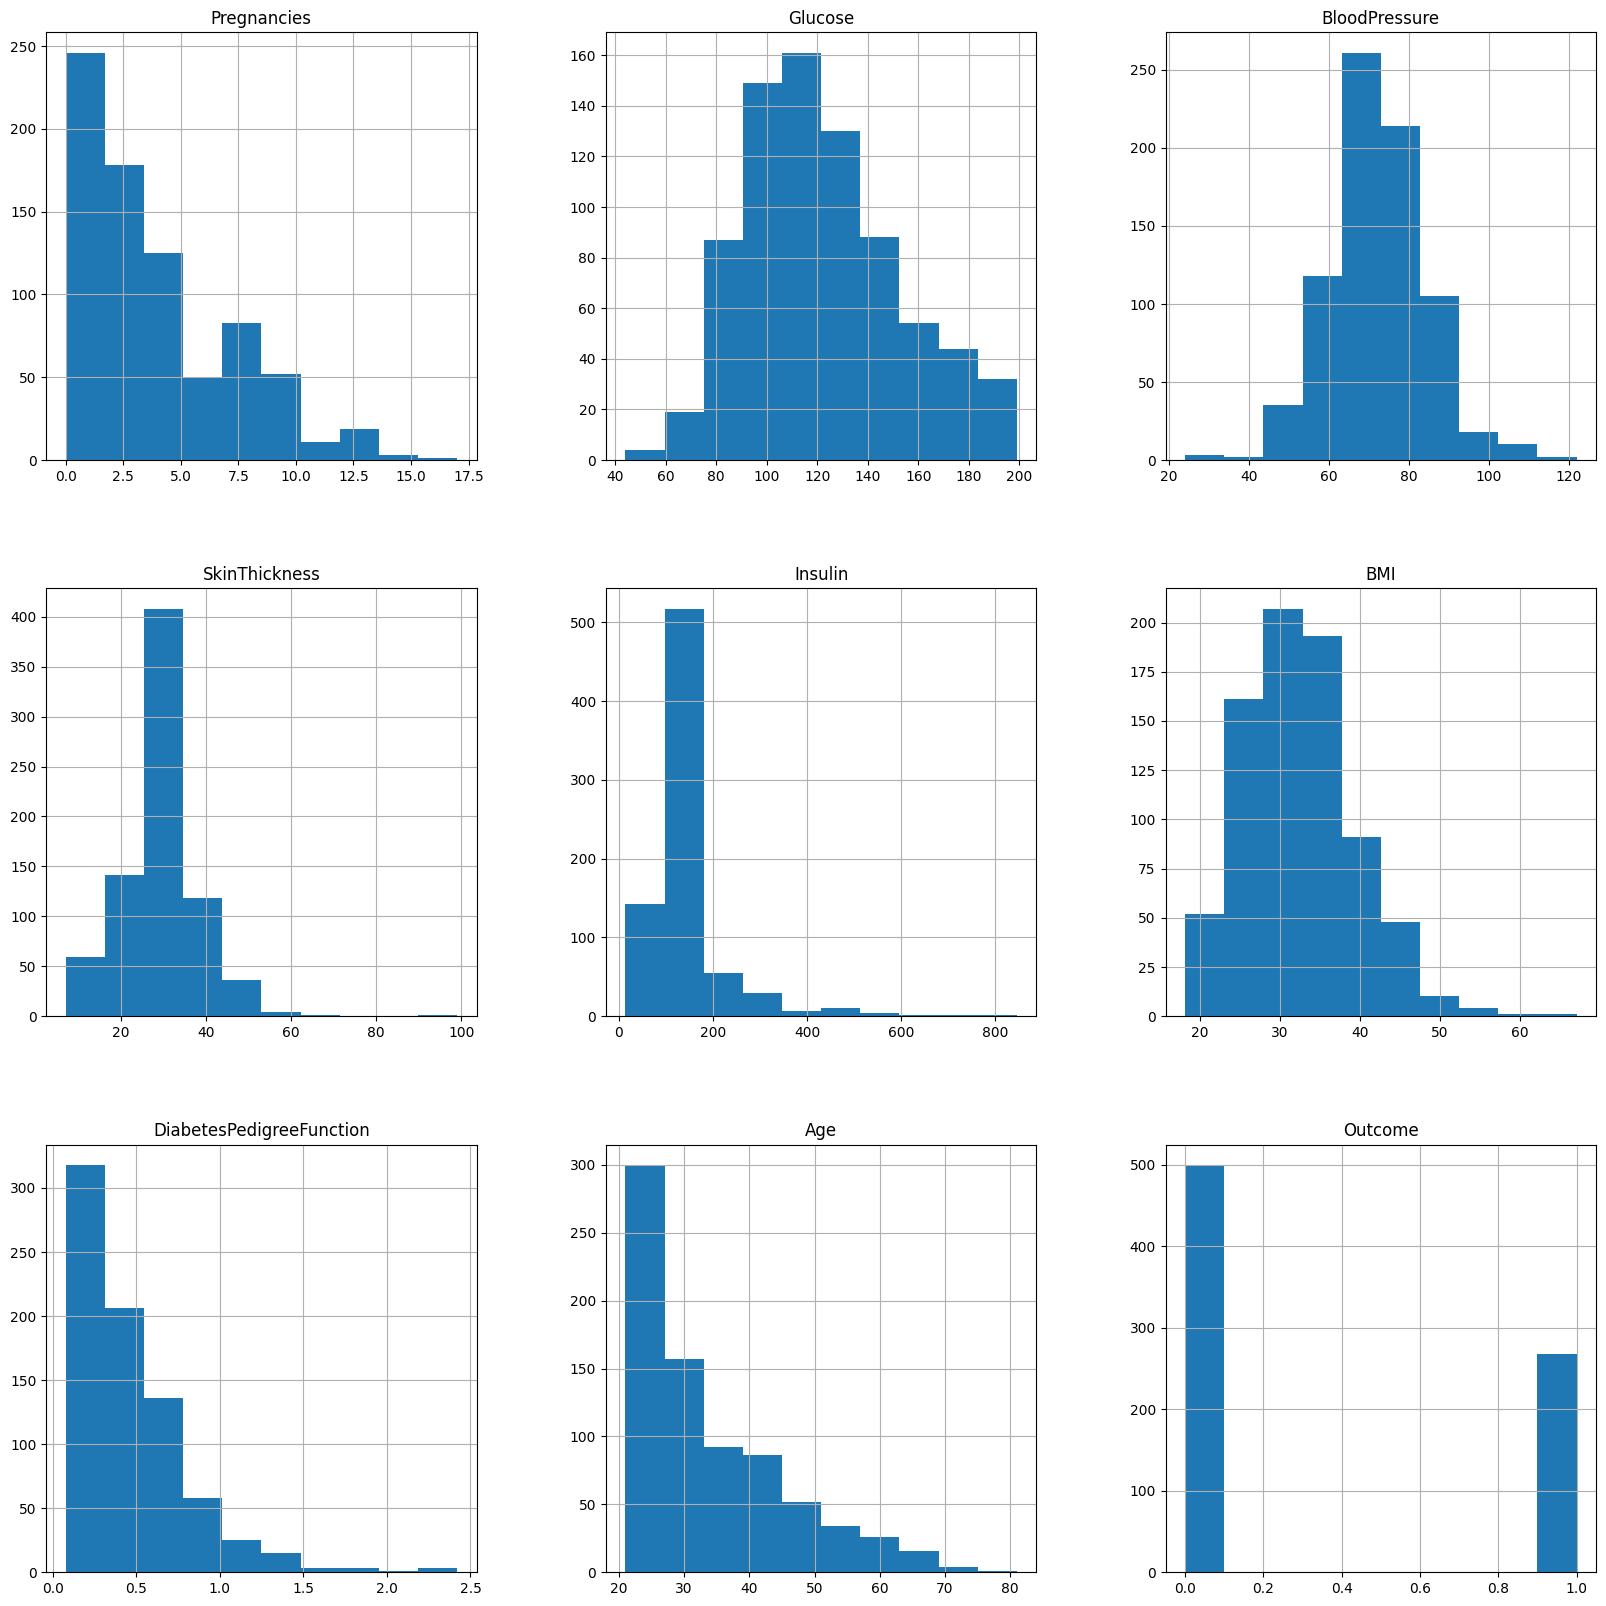

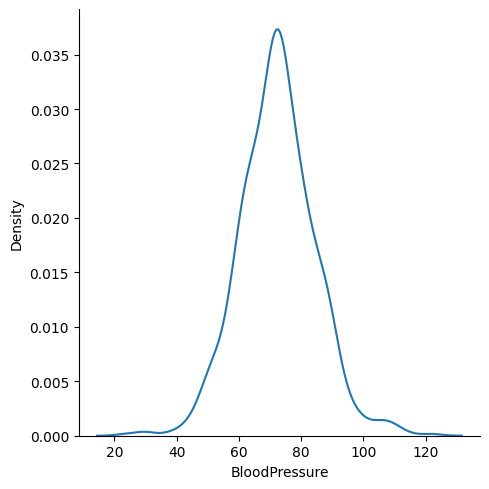

In [67]:

# llenar datos nulos
data_copy = dataset.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(data_copy.isnull().sum())
data_copy['Glucose'] = data_copy['Glucose'].fillna(data_copy['Glucose'].mean())
data_copy['BloodPressure'] = data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean())
data_copy['SkinThickness'] = data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median())
data_copy['Insulin'] = data_copy['Insulin'].fillna(data_copy['Insulin'].median())
data_copy['BMI'] = data_copy['BMI'].fillna(data_copy['BMI'].median())

p = data_copy.hist(figsize = (20,20))
sns.displot(data_copy['BloodPressure'], kind = 'kde')
plt.show()

### Análisis de features

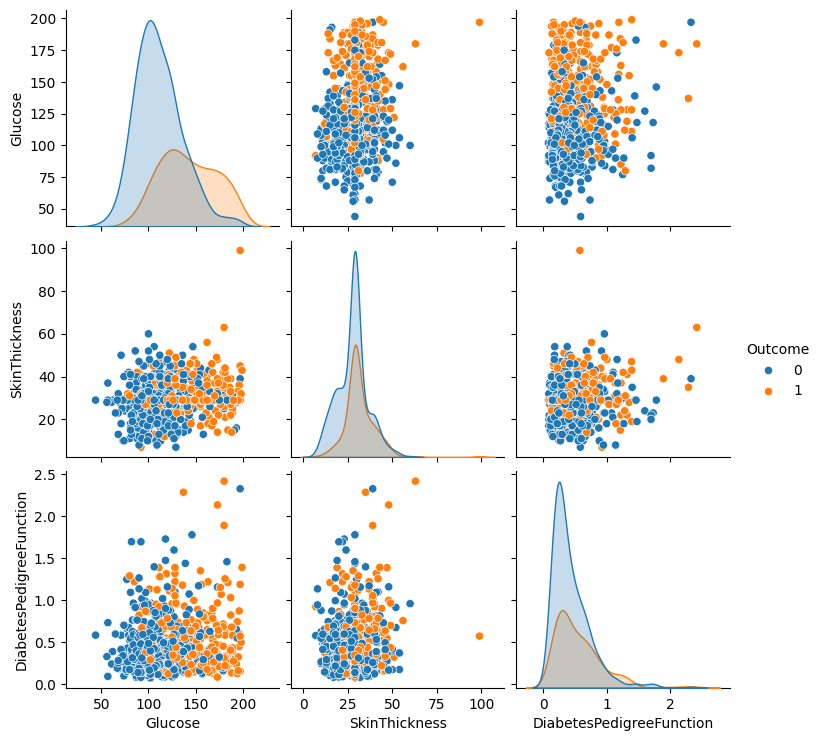

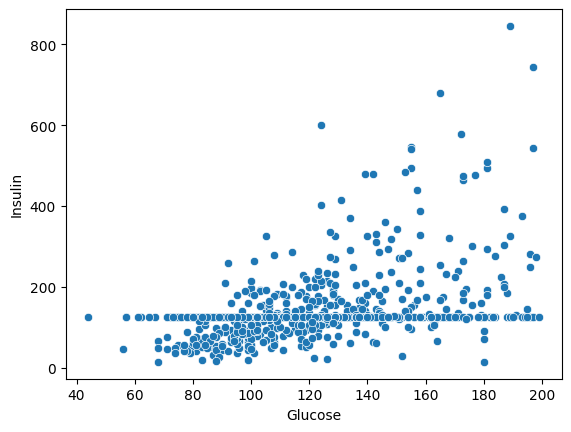

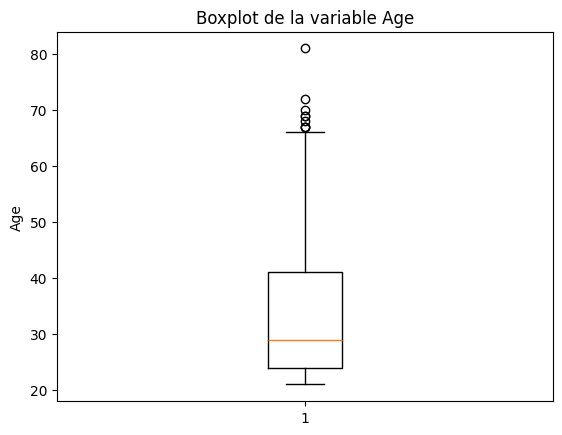

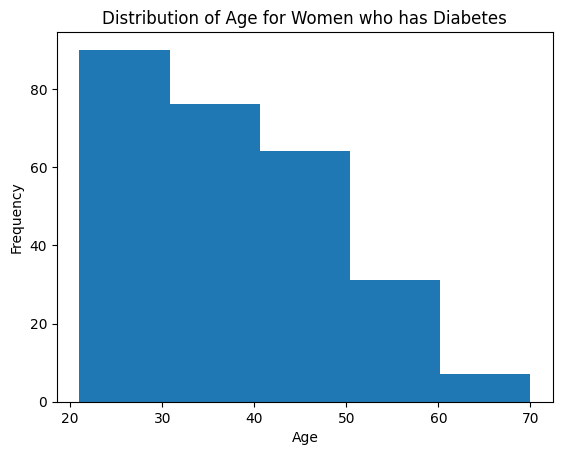

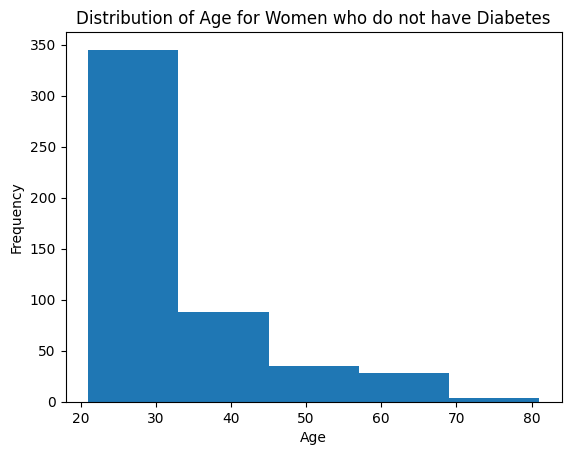

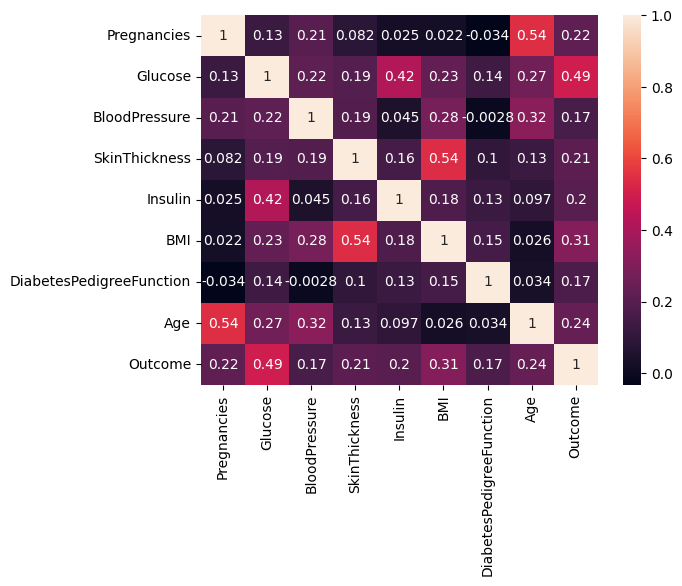

In [68]:

# El valor de "BMI" para la persona con el valor de "Glucose" más alto
data_copy[data_copy['Glucose'] == data_copy['Glucose'].max()]['BMI']

# ¿Cuántas mujeres tienen la glucosa por encima de la media?
data_copy[data_copy['Glucose'] > data_copy['Glucose'].mean()].shape[0]

# ¿Cuántas personas tienen un nivel de glucosa mayor al promedio y un índice de masa corporal menor al promedio?

dataset[(dataset['BloodPressure'] == dataset['BloodPressure'].median()) & (dataset['BMI'] < dataset['BMI'].median())].shape[0]

sns.pairplot(data = data_copy, vars = ['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue = 'Outcome')
plt.show()

sns.scatterplot(x = 'Glucose', y = 'Insulin', data = data_copy)
plt.show()

plt.boxplot(data_copy['Age'])
plt.title('Boxplot de la variable Age')
plt.ylabel('Age')
plt.show()

plt.hist(data_copy[data_copy['Outcome'] == 1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who has Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.hist(data_copy[data_copy['Outcome'] == 0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

sns.heatmap(data_copy.corr(), annot=True)
plt.show()

### Balanceo de features

536 536


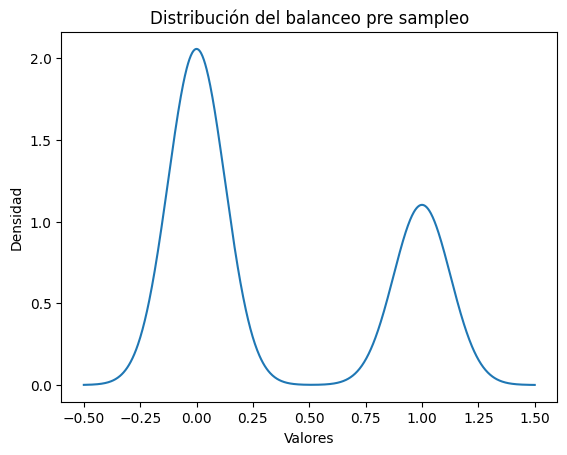

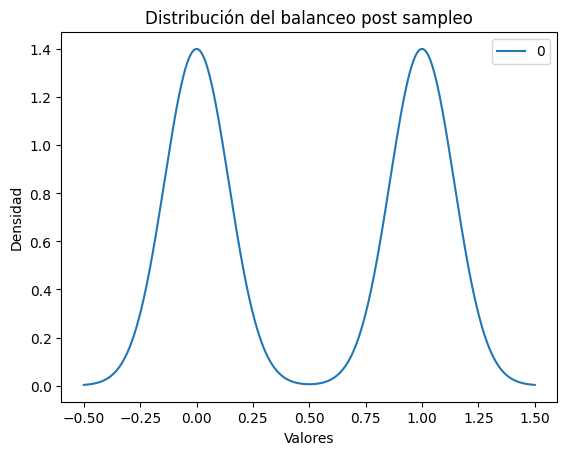

In [69]:

# incluir todos los features
X = data_copy.iloc[:, 0:8]
# incluir solo los labels
y = data_copy.iloc[:, 8]

# seleccionar casos positivos y negativos
positivo = X[y==1]
negativo = X[y==0]

dataset["Outcome"].plot(kind='kde').set_xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Distribución del balanceo pre sampleo")

# DownSample a negativo (clase mayor)
negativo_sampled = resample(negativo, replace=False,n_samples=len(positivo), random_state=42)

# juntar los datos X positivos y negativos sampleados
X_sampled = pd.concat([positivo,negativo_sampled])

# juntar datos Y correspondientes a positivos y negativos sampleados
Y_Pos = pd.DataFrame(np.ones((len(positivo), 1)))
Y_Neg = pd.DataFrame(np.zeros((len(negativo_sampled), 1)))
Y_sampled = pd.concat([Y_Pos, Y_Neg])

print(len(X_sampled),len(Y_sampled))

Y_sampled.plot(kind='kde').set_xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Distribución del balanceo post sampleo")

x_train, x_test, y_train, y_test = train_test_split(X_sampled.values, Y_sampled.values.ravel(), test_size=0.2, random_state=42, stratify=Y_sampled.values.ravel())

### Regresión logística

In [70]:

# Model Training and Prediction using Logistic Regresion
logreg1 = LogReg(random_state=None, max_iter=1000, fit_intercept=True, tol = 0.5, C=0.1).fit(x_train, y_train)
y_pred1 = logreg1.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred1))

print("")

logreg2 = LogReg(solver = "liblinear").fit(x_train, y_train)
y_pred2 = logreg2.predict(x_test)
print ("Accuracy: " , accuracy_score (y_test , y_pred2))
print("Reporte de clasificación con Regresión Logística:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.6481481481481481

Accuracy:  0.75
Reporte de clasificación con Regresión Logística:
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75        54
         1.0       0.75      0.74      0.75        54

    accuracy                           0.75       108
   macro avg       0.75      0.75      0.75       108
weighted avg       0.75      0.75      0.75       108



### K-Nearest Neighbors

In [71]:
# Model Training and Prediction using KNN
test_scores = []
train_scores = []

for i in range(1,30):
    knn = KNN(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max train score 100.0 % and k = [1]
Max test score 73.14814814814815 % and k = [5, 7, 11, 20, 22, 27, 29]


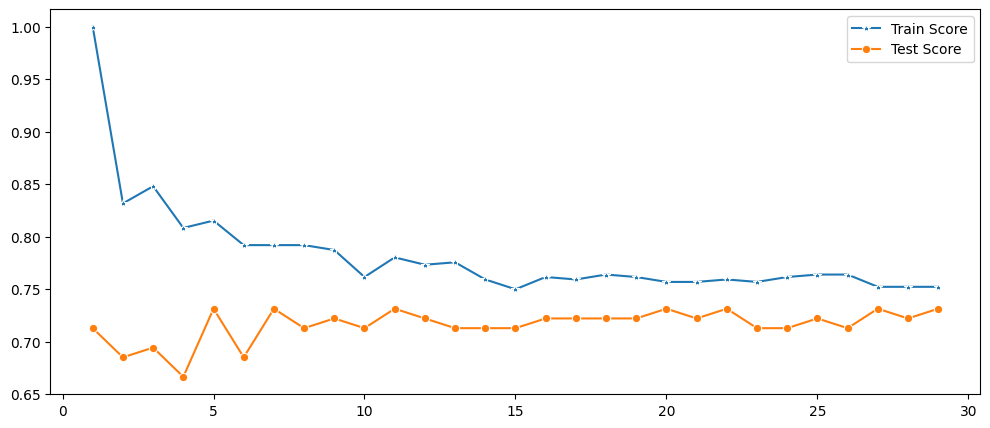

In [72]:
plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 30), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 30), y=test_scores, marker='o', label='Test Score')

In [73]:
knn = KNN(20)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7314814814814815

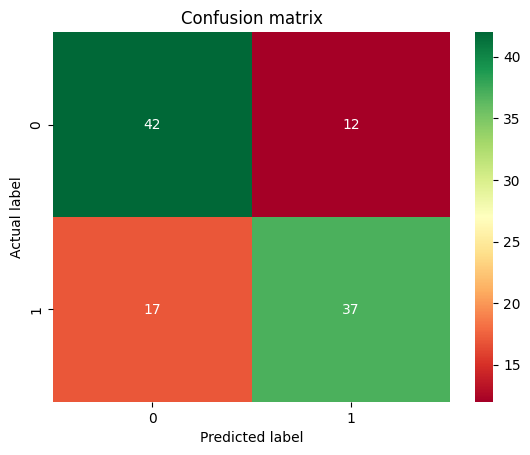

In [74]:
# Model Performance Analysis
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="RdYlGn" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [75]:
print("Reporte de clasificación con KNN:")
print(classification_report(y_test,y_pred))

Reporte de clasificación con KNN:
              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74        54
         1.0       0.76      0.69      0.72        54

    accuracy                           0.73       108
   macro avg       0.73      0.73      0.73       108
weighted avg       0.73      0.73      0.73       108



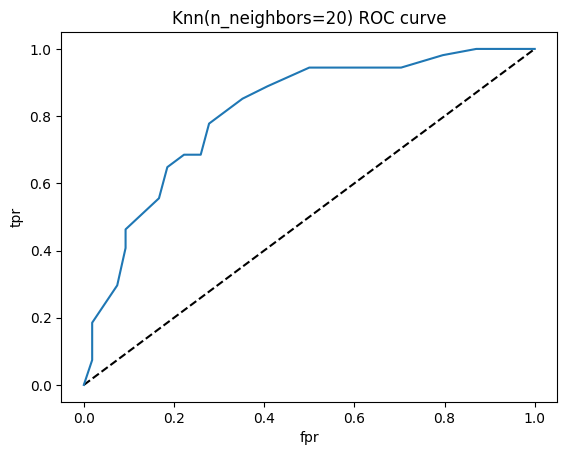

0.8112139917695473

In [76]:
y_pred_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=20) ROC curve')
plt.show()

roc_auc_score(y_test,y_pred_proba)

In [77]:
param_grid = {'n_neighbors':np.arange(1,30)}
knn = KNN()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_sampled.values, Y_sampled.values.ravel())
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7276739356178609
Best Parameters: {'n_neighbors': 13}


### Red Neuronal

In [78]:
acc = {}
for i in range(2, 201):
    nn = MLPClassifier(hidden_layer_sizes=(i,i,i), max_iter=10000)
    nn.fit(x_train, y_train)
    nn_pred = nn.predict(x_test)
    score = accuracy_score(y_test, nn_pred)
    acc[i] = score
#max value of dictionary, key and value
print( max(acc.items(), key=lambda x : x[1]) )

(21, 0.7407407407407407)


## Bankruptcy Prediction

In [79]:
dataset = pd.read_csv('Datasets/bankruptcy.csv')

### Análisis de features

In [80]:
dataset.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [81]:
dataset.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


In [82]:
dataset.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [83]:
dataset.columns = dataset.columns.str.strip()
dataset.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [84]:
dataset.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [85]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [86]:
dataset.isnull().sum()

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

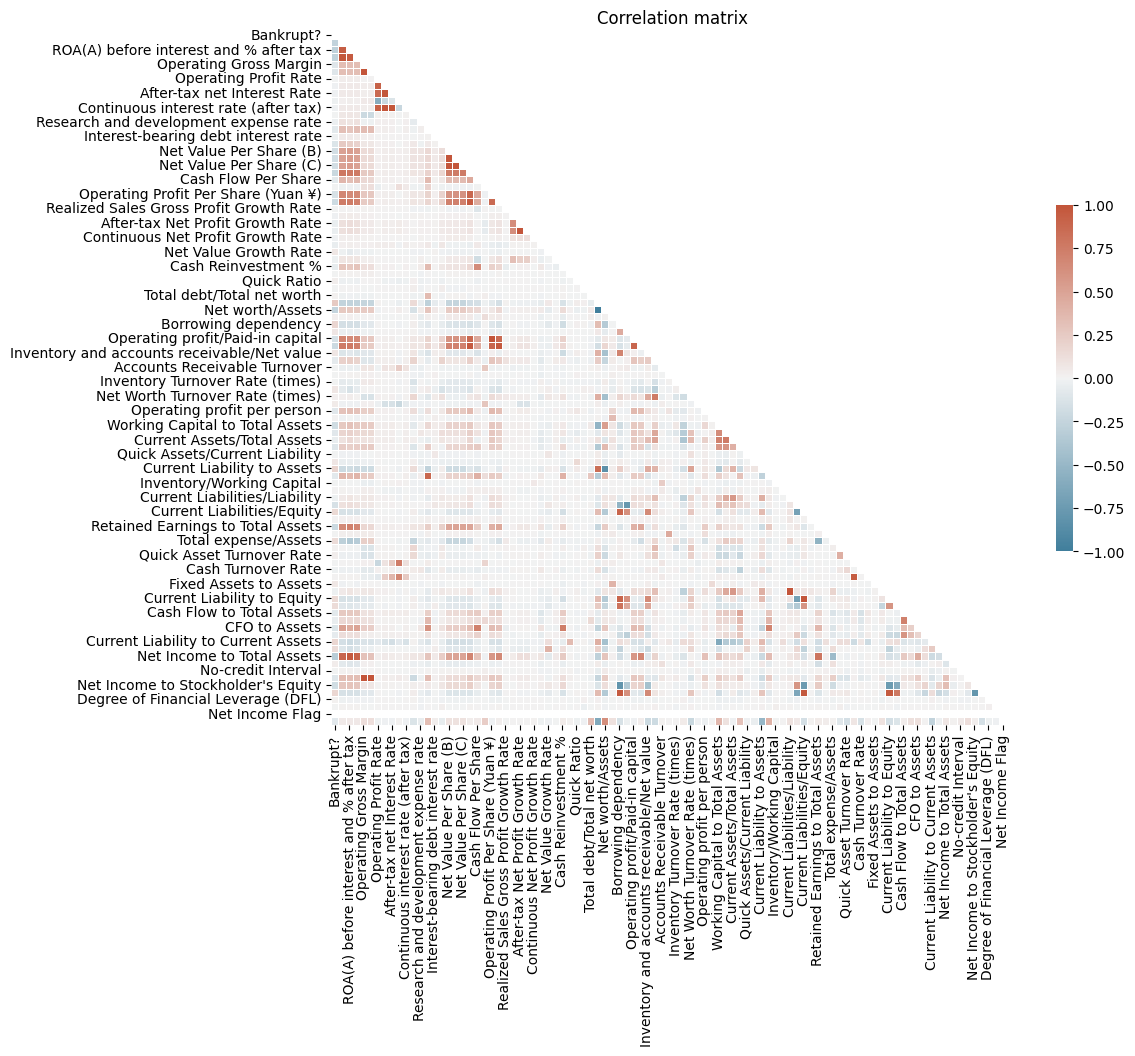

In [87]:
# Calcular la matriz de correlación
corr = dataset.corr()
# Generar una máscara para la parte superior del triángulo
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation matrix")
plt.show()

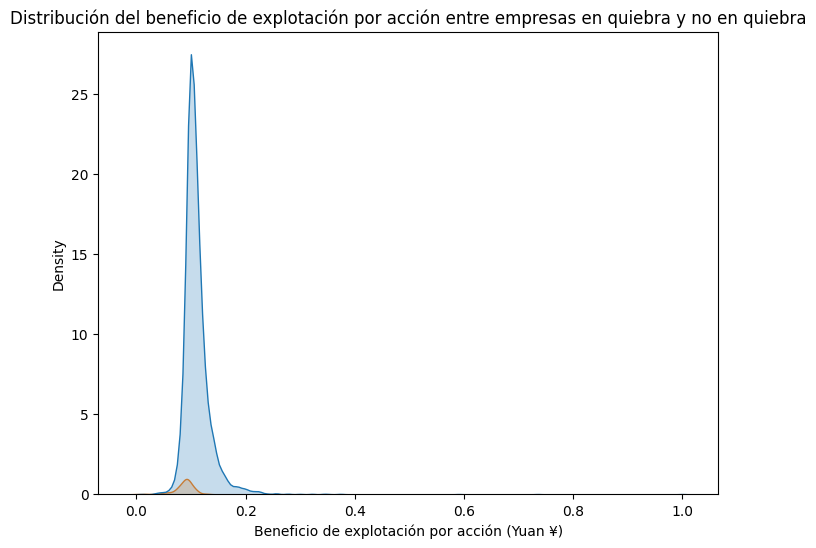

In [88]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=dataset, x='Operating Profit Per Share (Yuan ¥)', hue='Bankrupt?', fill=True, legend=False)
plt.title('Distribución del beneficio de explotación por acción entre empresas en quiebra y no en quiebra')
plt.xlabel('Beneficio de explotación por acción (Yuan ¥)')
plt.ylabel('Density')
plt.show()

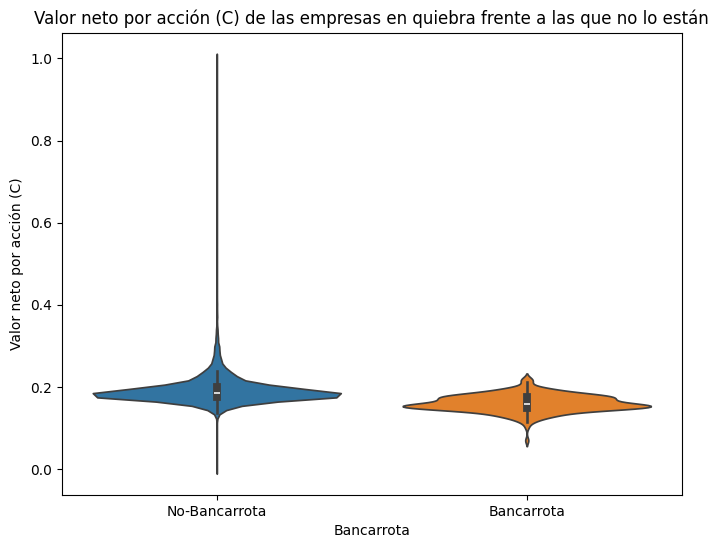

In [89]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Bankrupt?', y='Net Value Per Share (C)', data=dataset, hue='Bankrupt?', legend=False)
plt.title('Valor neto por acción (C) de las empresas en quiebra frente a las que no lo están')
plt.xlabel('Bancarrota')
plt.ylabel('Valor neto por acción (C)')
plt.xticks([0, 1], ['No-Bancarrota', 'Bancarrota'])
plt.show()

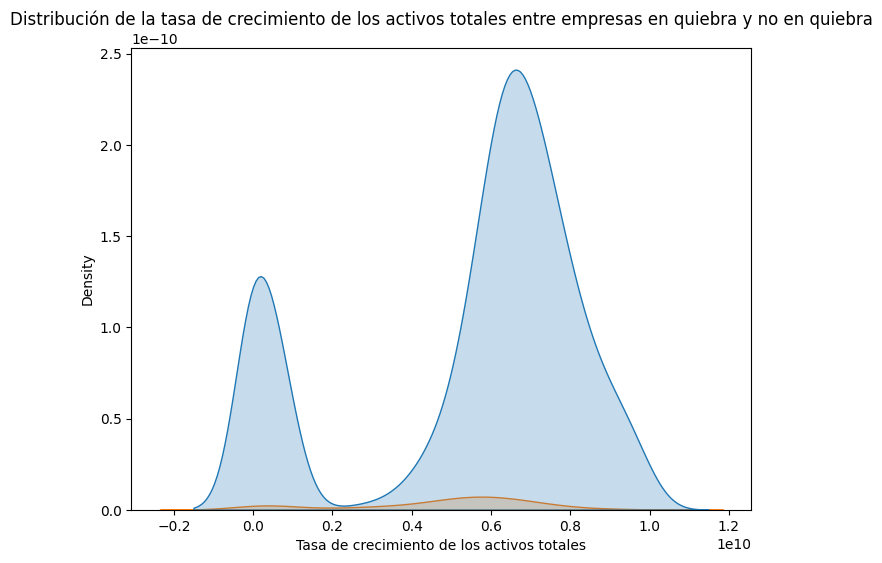

In [90]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=dataset, x='Total Asset Growth Rate', hue='Bankrupt?', fill=True, legend=False)
plt.title('Distribución de la tasa de crecimiento de los activos totales entre empresas en quiebra y no en quiebra')
plt.xlabel('Tasa de crecimiento de los activos totales')
plt.ylabel('Density')
plt.show()

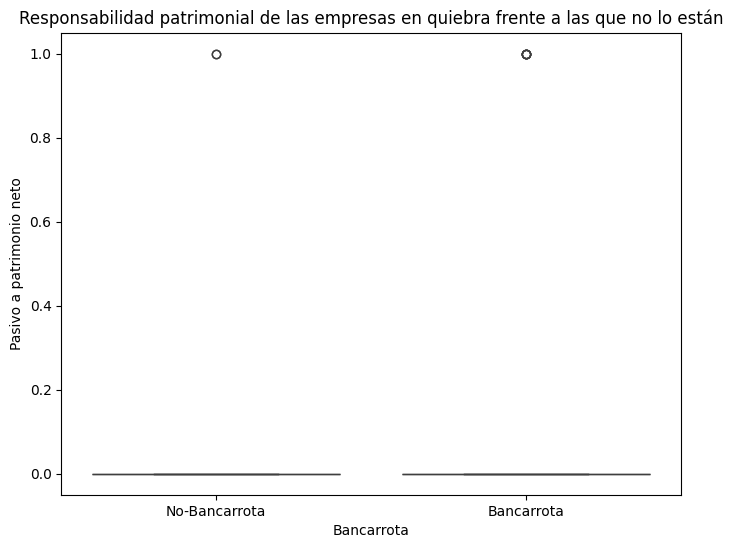

In [91]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Bankrupt?', y='Liability-Assets Flag', data=dataset)
plt.title('Responsabilidad patrimonial de las empresas en quiebra frente a las que no lo están')
plt.xlabel('Bancarrota')
plt.ylabel('Pasivo a patrimonio neto')
plt.xticks([0, 1], ['No-Bancarrota', 'Bancarrota'])
plt.show()

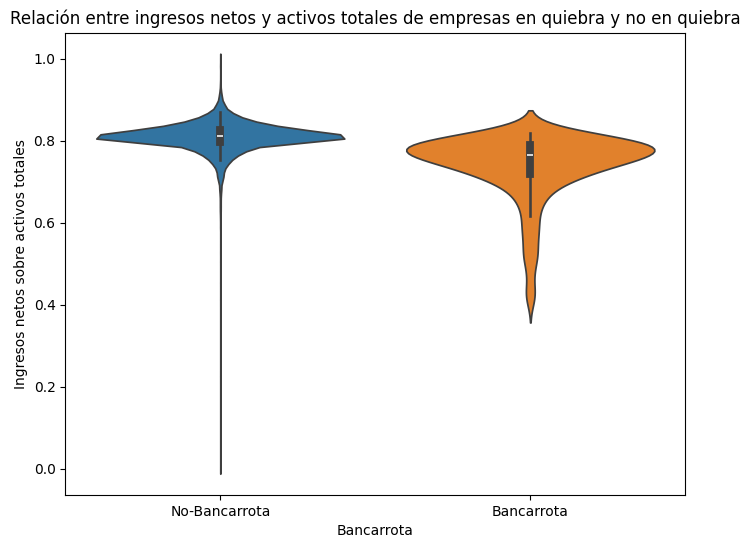

In [92]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Bankrupt?', y='Net Income to Total Assets', data=dataset, hue='Bankrupt?', legend=False)
plt.title('Relación entre ingresos netos y activos totales de empresas en quiebra y no en quiebra')
plt.xlabel('Bancarrota')
plt.ylabel('Ingresos netos sobre activos totales')
plt.xticks([0, 1], ['No-Bancarrota', 'Bancarrota'])
plt.show()

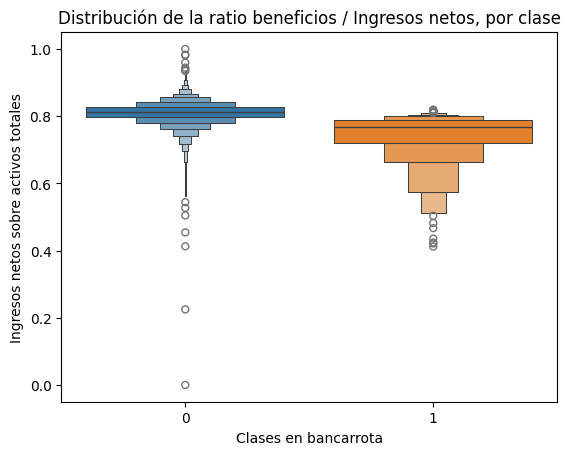

In [93]:
sns.boxenplot(x="Bankrupt?" , y="Net Income to Total Assets" , data=dataset, hue="Bankrupt?", legend=False)
plt.xlabel("Clases en bancarrota")
plt.ylabel("Ingresos netos sobre activos totales")
plt.title("Distribución de la ratio beneficios / Ingresos netos, por clase");

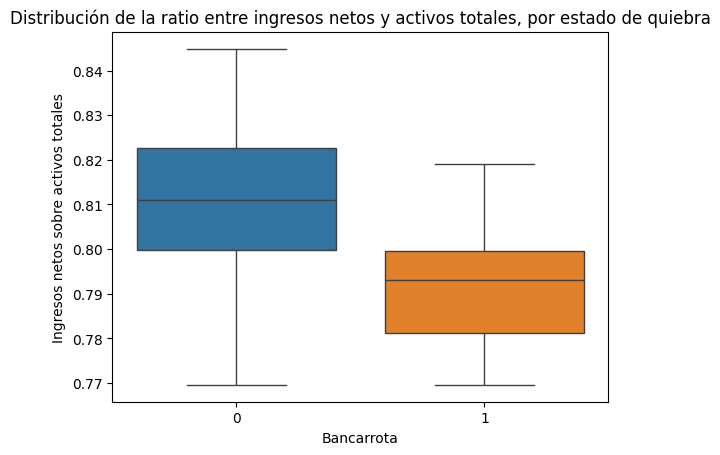

In [94]:
quartile1 , quartile9 = dataset['Net Income to Total Assets'].quantile([0.1,0.9])
mask = dataset["Net Income to Total Assets"].between(quartile1 , quartile9)
sns.boxplot(x='Bankrupt?' , y='Net Income to Total Assets', data= dataset[mask], hue='Bankrupt?', legend=False)
plt.xlabel("Bancarrota")
plt.ylabel("Ingresos netos sobre activos totales")
plt.title("Distribución de la ratio entre ingresos netos y activos totales, por estado de quiebra");

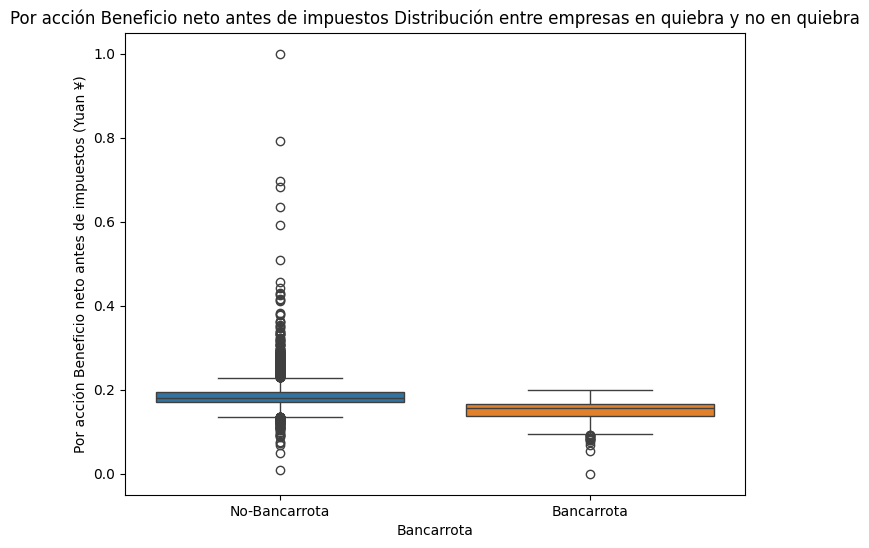

In [95]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Bankrupt?', y='Per Share Net profit before tax (Yuan ¥)', data=dataset, hue='Bankrupt?', legend=False)
plt.title('Por acción Beneficio neto antes de impuestos Distribución entre empresas en quiebra y no en quiebra')
plt.xlabel('Bancarrota')
plt.ylabel('Por acción Beneficio neto antes de impuestos (Yuan ¥)')
plt.xticks([0, 1], ['No-Bancarrota', 'Bancarrota'])
plt.show()

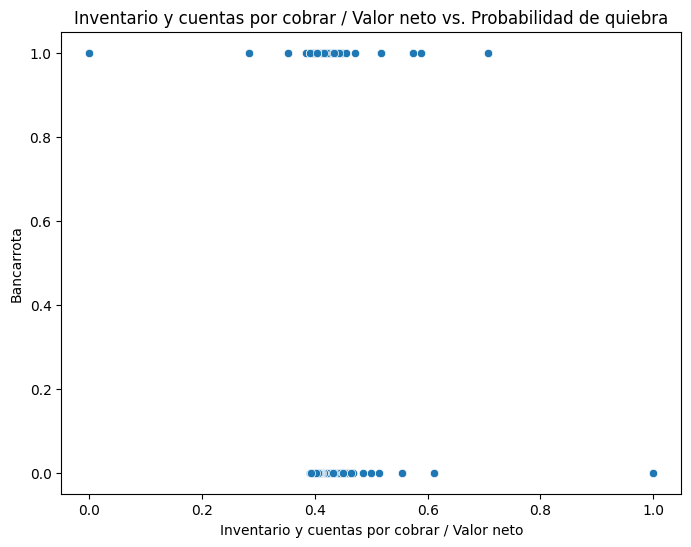

In [96]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Inventory and accounts receivable/Net value', y='Bankrupt?', data=dataset)
plt.title('Inventario y cuentas por cobrar / Valor neto vs. Probabilidad de quiebra')
plt.xlabel('Inventario y cuentas por cobrar / Valor neto')
plt.ylabel('Bancarrota')
plt.show()

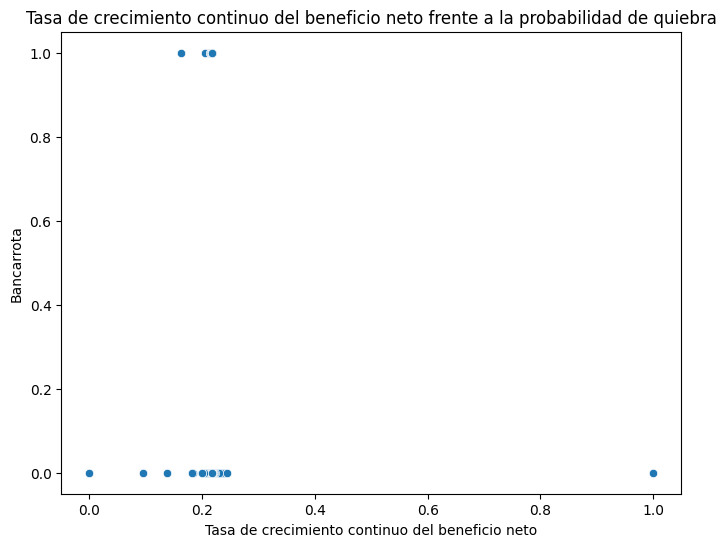

In [97]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Continuous Net Profit Growth Rate', y='Bankrupt?', data=dataset)
plt.title('Tasa de crecimiento continuo del beneficio neto frente a la probabilidad de quiebra')
plt.xlabel('Tasa de crecimiento continuo del beneficio neto')
plt.ylabel('Bancarrota')
plt.show()

### Balanceo de features

Prueba de tamaño de X e Y
6819 6819
Prueba de tamaño de X e Y post sampleo
574 574


Text(0.5, 1.0, 'Distribución del balanceo post sampleo')

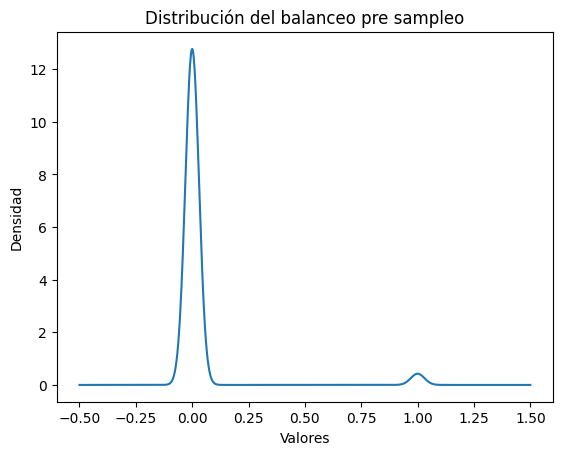

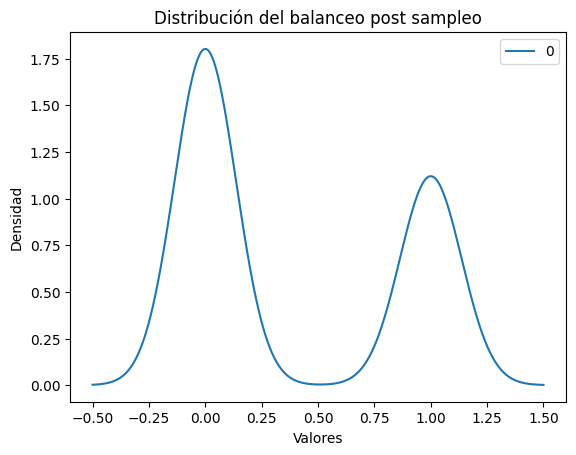

In [98]:
# incluir todos los features
X = dataset.iloc[:, 0:-1].drop(columns='Bankrupt?')
# incluir solo los labels
y = dataset.iloc[:, 0]
print("Prueba de tamaño de X e Y")
print(len(X),len(y))
# seleccionar casos positivos y negativos
positivo = X[y==1]
negativo = X[y==0]
dataset["Bankrupt?"].plot(kind='kde').set_xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Distribución del balanceo pre sampleo")
# DownSample a negativo (clase mayor)
negativo_sampled = resample(negativo, replace=True,n_samples=int(len(positivo)/0.62), random_state=42)
# juntar los datos X positivos y negativos sampleados
X_sampled = pd.concat([positivo,negativo_sampled])
# juntar datos Y correspondientes a positivos y negativos sampleados
Y_Pos = pd.DataFrame(np.ones((len(positivo), 1)))
Y_Neg = pd.DataFrame(np.zeros((len(negativo_sampled), 1)))
Y_sampled = pd.concat([Y_Pos, Y_Neg])
#verificar tamaño del post sampleo
print("Prueba de tamaño de X e Y post sampleo")
print(len(X_sampled),len(Y_sampled))
Y_sampled.plot(kind='kde').set_xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Distribución del balanceo post sampleo")

In [99]:
x_train, x_test, y_train, y_test = train_test_split(X_sampled, Y_sampled.values.ravel(), test_size=0.2, random_state=42, stratify=Y_sampled.values.ravel())
print(len(x_train),len(x_test))

459 115


### K-Nearest Neighbors

In [100]:
# Model Training and Prediction using KNN
test_scores = []
train_scores = []

for i in range(1,100):
    knn = KNN(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [101]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max train score 100.0 % and k = [1]
Max test score 70.43478260869566 % and k = [1, 33]


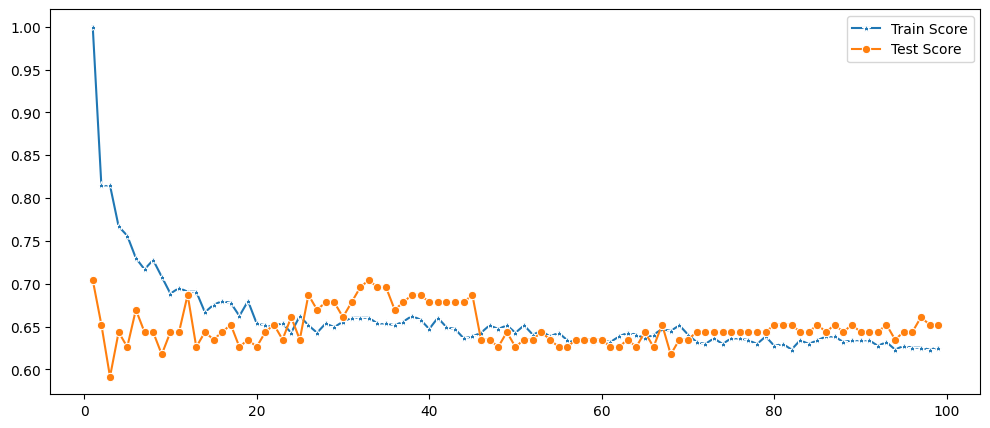

In [102]:
plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 100), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 100), y=test_scores, marker='o', label='Test Score')

In [103]:
knn = KNN(1)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7043478260869566

In [104]:
pred = knn.predict(x_test)
cm = confusion_matrix(y_test,pred)
print("Train set Accuracy: ", accuracy_score(y_train, knn.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, pred))

Train set Accuracy:  1.0
Test set Accuracy:  0.7043478260869566


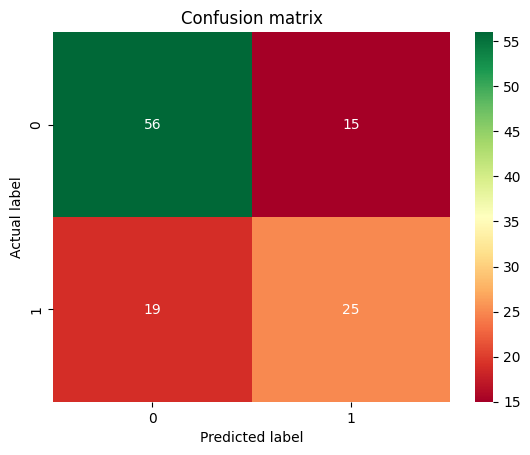

In [105]:
sns.heatmap(cm, annot=True, cmap="RdYlGn" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [106]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77        71
         1.0       0.62      0.57      0.60        44

    accuracy                           0.70       115
   macro avg       0.69      0.68      0.68       115
weighted avg       0.70      0.70      0.70       115



In [107]:
param_grid = {'n_neighbors':np.arange(1,100)}
knn = KNN()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_sampled.values, Y_sampled.values.ravel())
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.6498550724637682
Best Parameters: {'n_neighbors': 39}


### Regresión logística

In [108]:
# Model Training and Prediction using Logistic Regresion
logreg1 = LogReg(random_state=None, max_iter=1000, fit_intercept=True, tol = 0.5, C=0.1).fit(x_train, y_train)
y_pred1 = logreg1.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred1))
print("")
logreg2 = LogReg(solver = "liblinear").fit(x_train, y_train)
y_pred2 = logreg2.predict(x_test)
print ("Accuracy: " , accuracy_score (y_test , y_pred2))
print("Reporte de clasificación con Regresión Logística:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.6956521739130435

Accuracy:  0.6956521739130435
Reporte de clasificación con Regresión Logística:
              precision    recall  f1-score   support

         0.0       0.69      0.92      0.79        71
         1.0       0.71      0.34      0.46        44

    accuracy                           0.70       115
   macro avg       0.70      0.63      0.62       115
weighted avg       0.70      0.70      0.66       115



### Red Neuronal

In [109]:
acc = {}
for i in range(2, 201):
    nn = MLPClassifier(hidden_layer_sizes=(i,i,i), max_iter=10000)
    nn.fit(x_train, y_train)
    nn_pred = nn.predict(x_test)
    score = accuracy_score(y_test, nn_pred)
    acc[i] = score
#max value of dictionary, key and value
print( max(acc.items(), key=lambda x : x[1]) )

(169, 0.7478260869565218)


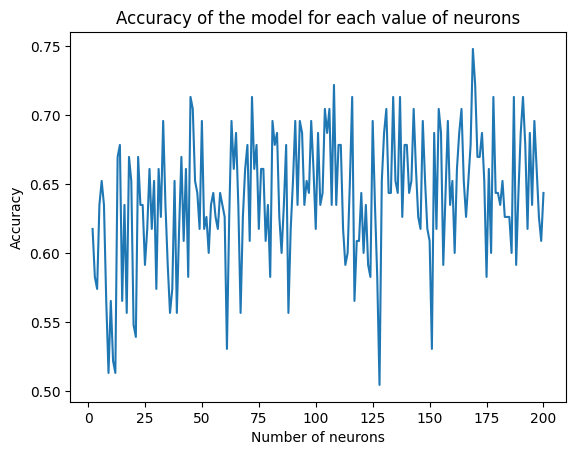

In [110]:
plt.plot(list(acc.keys()), list(acc.values()))
plt.xlabel("Number of neurons")
plt.ylabel("Accuracy")
plt.title("Accuracy of the model for each value of neurons")
plt.show()